## Setup

In [1]:
'''Locate the working directory'''
if __name__ == '__main__':    
    import sys
    from _path import workdir
    sys.path.append(workdir)
    print(sys.path[-1])

c:\Users\vince\OneDrive - The Chinese University of Hong Kong\python projects\py stellar perturbations\test\modes_aniso\..\..


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.static.tov import solve_tov
from src.eos.table import eos_table
from src.eos.anisotropy.H2 import sigma_H2
from src.perturb.pulsation.gr_aniso.bvp import bvp_LD_aniso

## Parameters

In [3]:
rho0 = 7.455e14
pcut = 1.e20
eos_file = 'eos_D12.txt'

In [4]:
rho_list, p_list = np.loadtxt('eos_D12.txt'\
                    ,skiprows=0, usecols=(2,3),unpack=True)

## Compute background solution

In [5]:
# eos = eos_poly(k = 1.e35/(1.e15)**2, n = 1.)
eos = eos_table(rho_list, p_list)
sigma = sigma_H2(beta = 0.)

tov=solve_tov(eos, sigma= sigma)
tov.ivp(p0=eos.p(rho0),pcut=pcut)

### Read Fortran

In [6]:
r_f90, p_f90 = np.loadtxt('f90_tov.txt', skiprows=1, usecols=(0,1),unpack=True)
rm_f90, Wr_f90 = np.loadtxt('f90_mode.dat', skiprows=3, usecols=(0,3),unpack=True)

### Compare Background

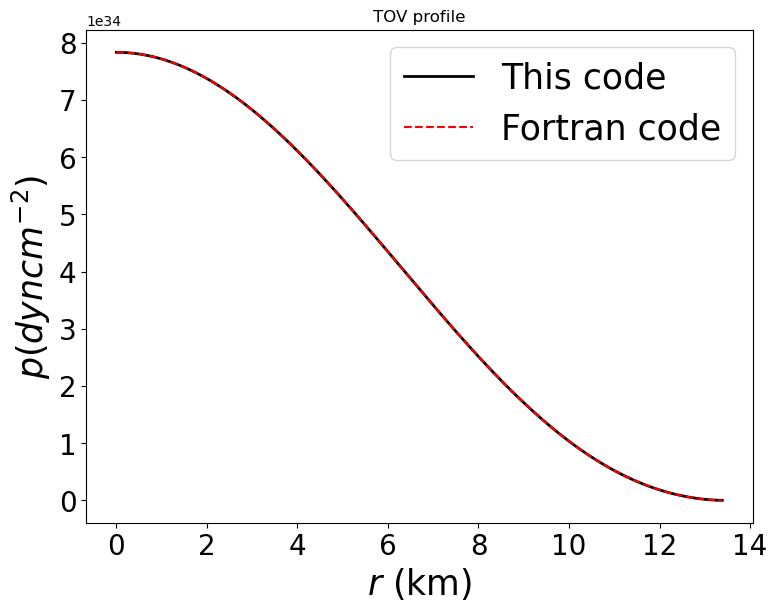

In [7]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.plot(tov.r/1.e5, tov.p, 'k-', linewidth = 2, label = 'This code')
plt.plot(r_f90/1.e5, p_f90, 'r--', label = 'Fortran code')
plt.title(r'TOV profile')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r$ (km)',fontsize=25)
plt.ylabel(r'$p (dyn cm^{-2})$',fontsize=25)
plt.legend(fontsize=25)
plt.show()
plt.close()

### Compare BVP

In [8]:
bvp = bvp_LD_aniso(ell=2., w= (1574.+1j*0.55)*2*np.pi, bsol=tov)
bvp.ode_method = 'RK45'
bvp.atol_factor, bvp.rtol = 1.e-8, 1.e-6
bvp.z_atol_factor, bvp.z_rtol = 1.e-14, 1.e-8
_ , _ = bvp.solve_all(save_data=True)

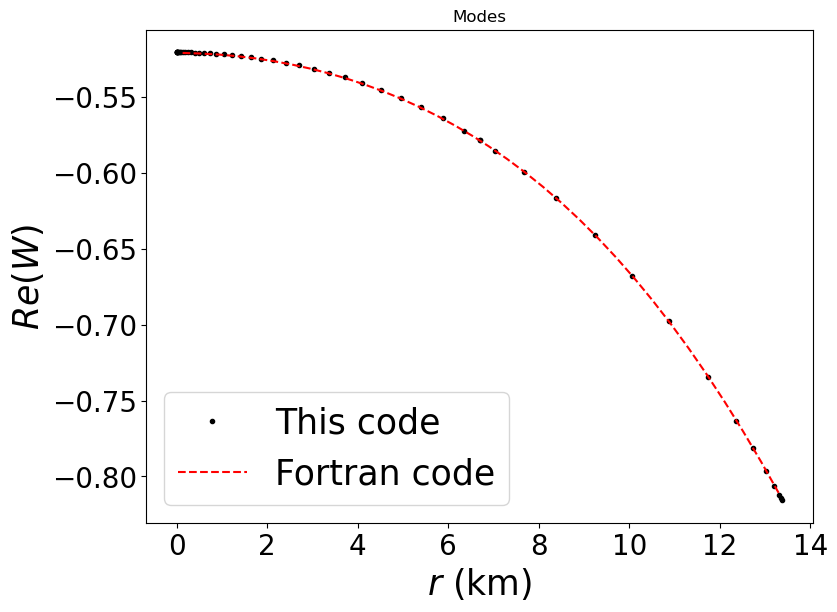

In [9]:
plt.figure(figsize=(8.6,6.4), dpi= 100)
plt.plot(bvp.rsol/1.e5, np.real(bvp.ysol[2,:]), 'k.', linewidth = 2, label = 'This code')
plt.plot(rm_f90/1.e5, Wr_f90, 'r--', label = 'Fortran code')
plt.title(r'Modes')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r$ (km)',fontsize=25)
plt.ylabel(r'$Re(W)$',fontsize=25)
plt.legend(fontsize=25)
plt.show()
plt.close()

In [10]:
bvp2 = bvp_LD_aniso(ell=2., w= (4335.73+1j*0.035)*2*np.pi, bsol=tov)
bvp.ode_method = 'RK45'
bvp.atol_factor, bvp.rtol = 1.e-8, 1.e-6
bvp.z_atol_factor, bvp.z_rtol = 1.e-14, 1.e-8
_, _ = bvp2.solve_all()